<a href="https://colab.research.google.com/github/ChhaSahil/Rinex_MP/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classifying the object as Mine or Rock

Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Reading the Data

In [ ]:
sonar=pd.read_csv('/content/sonar data.csv',header=None)

In [ ]:
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar.shape

(208, 61)

The table has 60 columns and last column has the output whether it is Rock('R') or Mine('M') 

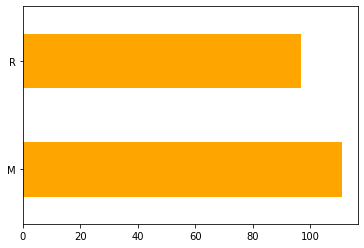

In [ ]:
sonar[60].value_counts().plot(kind='barh',color='orange')

In [ ]:
data=sonar.drop(60,axis=1)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [ ]:
target=pd.get_dummies(sonar[60])

In [ ]:
target

,M,R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
203,1,0
204,1,0
205,1,0
206,1,0


In [ ]:
target_r=target['R']
target_m=target['M']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target_m,test_size=.30,random_state=43)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
poly=PolynomialFeatures(2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifiers=[(
    'AdaBoost',AdaBoostClassifier()
),('Decision Tree',DecisionTreeClassifier(max_depth=10)),
('Naive Bayes',GaussianNB()),('KNeighbors',KNeighborsClassifier(3)),("SGDClassifier", SGDClassifier(max_iter=1000, tol=10e-3,penalty='elasticnet')), ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0)))
,("RBF SVM",SVC(gamma=2, C=1,probability=True)),("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1)),("Neural Net",MLPClassifier(alpha=1))]

In [ ]:
#clf_n.append('Gaussian Process')

In [ ]:
#clf=Pipeline([('Poly',poly),('CLF', GaussianProcessClassifier(1.0 * RBF(1.0)))])

Training Done


In [ ]:
clf_n=[]
train_scores=[]
test_scores=[]
for i,clf in classifiers:
  clf_n.append(i)
  clf=Pipeline([('Poly',poly),('CLF',clf)])
  clf.fit(X_train,y_train)
  print(i+' training done')
  train_scores.append(clf.score(X_train,y_train))
  print(i+' training score done')
  test_scores.append(clf.score(X_test,y_test))
  print(i+" testing score done")

AdaBoost training done
AdaBoost training score done
AdaBoost testing score done
Decision Tree training done
Decision Tree training score done
Decision Tree testing score done
Naive Bayes training done
Naive Bayes training score done
Naive Bayes testing score done
KNeighbors training done
KNeighbors training score done
KNeighbors testing score done
SGDClassifier training done
SGDClassifier training score done
SGDClassifier testing score done
Gaussian Process training done
Gaussian Process training score done
Gaussian Process testing score done
RBF SVM training done
RBF SVM training score done
RBF SVM testing score done
Random Forest training done
Random Forest training score done
Random Forest testing score done
Neural Net training done
Neural Net training score done
Neural Net testing score done


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


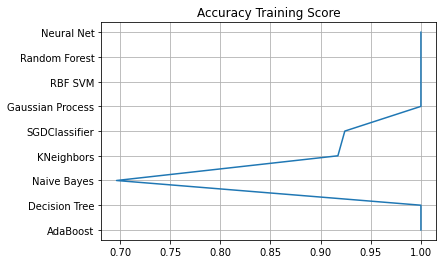

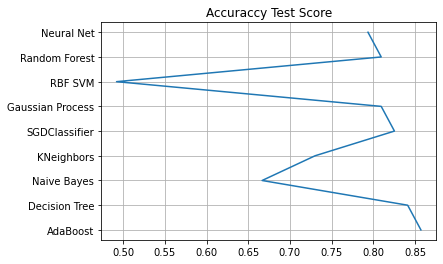

In [ ]:
plt.title('Accuracy Training Score')
plt.grid()
plt.plot(train_scores,clf_n)
plt.show()

plt.title('Accuraccy Test Score')
plt.grid()
plt.plot(test_scores,clf_n)
plt.show()

In [ ]:
rng=np.random.RandomState(1)
clf = GaussianProcessClassifier(1.0 * RBF(1.0))
clf = Pipeline([('POLY', poly),
                ('Gausian Process', clf)])
%time clf.fit(X_train, y_train)

CPU times: user 512 ms, sys: 445 ms, total: 957 ms
Wall time: 497 ms


Pipeline(steps=[('POLY', PolynomialFeatures()),
                ('Gausian Process',
                 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)))])

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.8095238095238095

In [ ]:
pred=clf.predict(X_test)

In [ ]:
clf.predict(X_test).sum()

38

In [ ]:
y_test.sum()

30

In [ ]:
from sklearn.metrics import accuracy_score 

In [ ]:
accuracy=accuracy_score(pred,y_test)

In [ ]:
accuracy

0.8095238095238095

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Train results: confusion matrix
[[64  0]
 [ 0 81]]


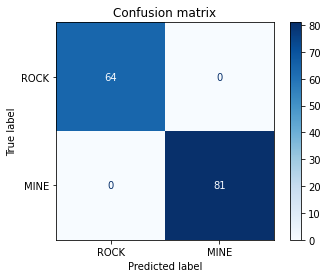

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_train, y_train,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Train results: confusion matrix')
print(disp.confusion_matrix)

Test results: confusion matrix
[[23 10]
 [ 2 28]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


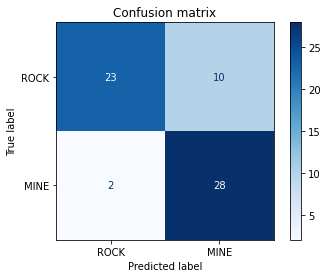

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Test results: confusion matrix')
print(disp.confusion_matrix)

#Using AdaBoostClassifier

In [ ]:
clf2 = AdaBoostClassifier(n_estimators=1000,random_state=43)
clf2 = Pipeline([('POLY', poly),
                ('ADABOOST', clf2)])
%time clf2.fit(X_train, y_train)

CPU times: user 31.7 s, sys: 155 ms, total: 31.8 s
Wall time: 32.6 s


Pipeline(steps=[('POLY', PolynomialFeatures()),
                ('ADABOOST',
                 AdaBoostClassifier(n_estimators=1000, random_state=43))])

In [ ]:
clf2.score(X_train, y_train)

1.0

AdaBoostClassifier is performing better than others

In [ ]:
clf2.score(X_test,y_test)

0.8253968253968254

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Train results: confusion matrix
[[64  0]
 [ 0 81]]


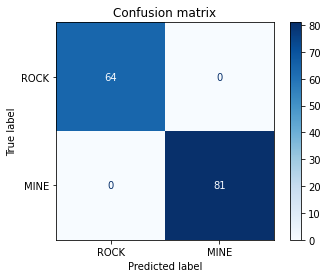

In [ ]:
disp = plot_confusion_matrix(clf2, X_train, y_train,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Train results: confusion matrix')
print(disp.confusion_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Train results: confusion matrix
[[26  7]
 [ 4 26]]


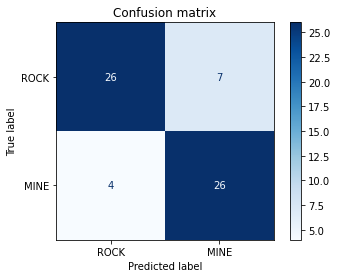

In [ ]:
disp = plot_confusion_matrix(clf2, X_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Train results: confusion matrix')
print(disp.confusion_matrix)